In [1]:
# Import modul yang dibutuhin di awal - awal

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **DATA EXPLORATION**

In [2]:
# Membaca datasetnya, sumber data = https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data

df = pd.read_csv('winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Cek apakah data ada nilai Null

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality', ylabel='Count'>

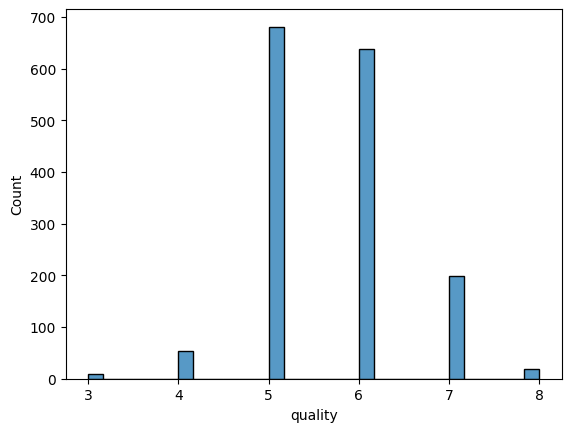

In [4]:
# Cek variabel kualitas wine

sns.histplot(df.quality)

In [5]:
# Wine bagus, sesuai deskripsi datasetnya, nilai kualitas di atas 6.5
wine_bagus = df[df.quality >= 6.5]

# Total wine bagus
wine_bagus.quality.value_counts().sum()

217

In [6]:
# Kebalikan dari wine bagus, wine jelek sesuai deskripsi datasetnya, nilai kualitas di bawah 6.5
wine_jelek = df[df.quality <= 6.5]
# Total wine jelek
wine_jelek.quality.value_counts().sum()

1382

In [7]:
# Membuat kolom baru menyederhanakan kualitas wine sesuai deskripsi, jika nilai kualitas di atas 6.5 artinya bagus atau bernilai 1

df['wine_bagus'] = df['quality'].apply(lambda x : 1 if x >= 6.5 else 0)
df.drop('quality', axis = 1, inplace = True)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_bagus
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


wine_bagus
0    1382
1     217
Name: count, dtype: int64

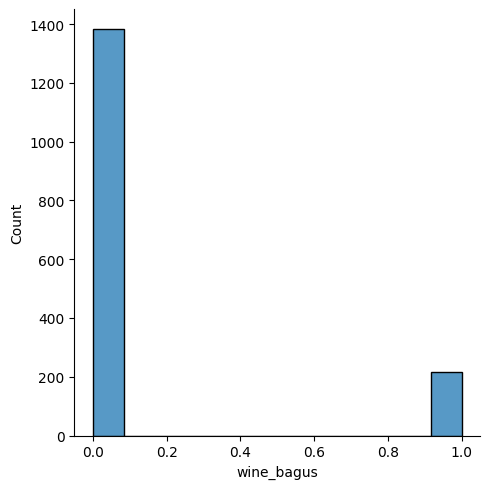

In [8]:
# Mencocokkan kembali jumlah wine bagus dan tidak bagus (217 dan 1382)
sns.displot(x = 'wine_bagus', data = df)

df.wine_bagus.value_counts()

<Axes: >

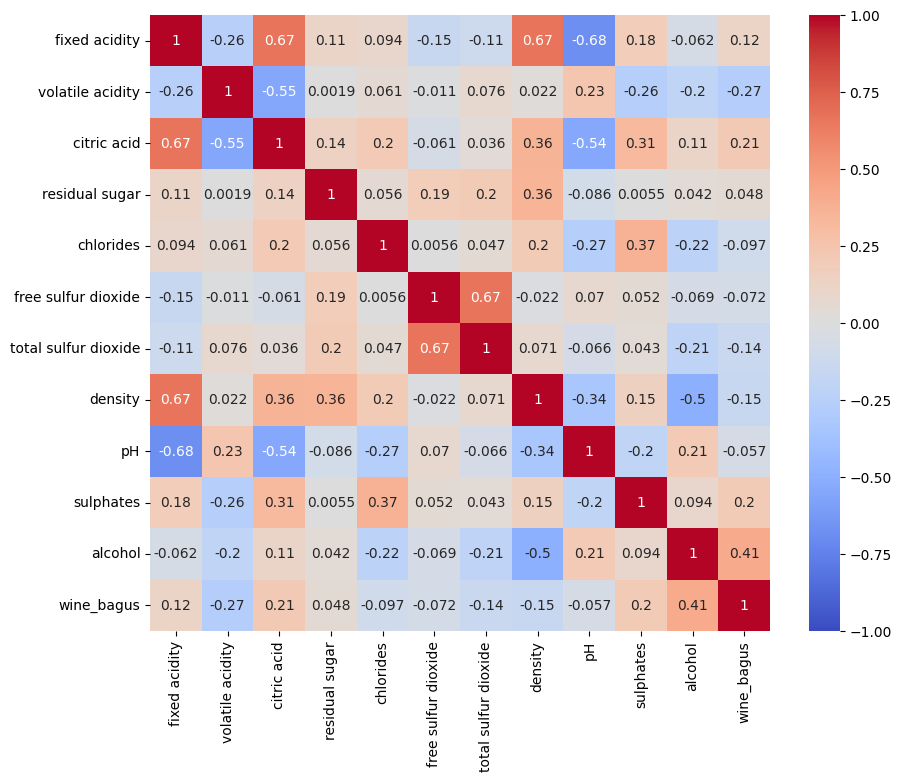

In [9]:
# Melihat korelasi antar variabel

plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')

Sebenarnya aku ingin drop korelasi yang mendekati angka 0, namun karena keterbatasan pengetahuan mengenai komposisi _wine_, maka aku tidak akan drop dan tetap menggunakan variabel tersebut

In [10]:
# Membuat variabel x & y

x = df.drop('wine_bagus', axis = 1)
y = df['wine_bagus']

In [11]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [12]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: wine_bagus, Length: 1599, dtype: int64

## **MODELLING**

### Dikarenakan data imbalance, jadi aku akan melakukan undersampling atau upsampling terlebih dahulu sebelum memasuki proses model

In [13]:
# Melakukan test train split data terlebih dahulu

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [14]:
# Cek variable train

x_train.shape, y_train.shape

((1279, 11), (1279,))

In [15]:
# Cek value y_train

y_train.value_counts()

wine_bagus
0    1103
1     176
Name: count, dtype: int64

In [16]:
# Cek variable test

x_test.shape, y_test.shape

((320, 11), (320,))

In [17]:
# Membuat fungsi model

# def model(modelnya, x, y)

#### Near-Miss Undersampling

In [18]:
from imblearn.under_sampling import NearMiss

metode_nm = NearMiss(version = 3, sampling_strategy = 'majority')
x_nm, y_nm = metode_nm.fit_resample(x_train, y_train)
print(f'Original dataset shape {y_train.value_counts()}\n\nNearMiss dataset shape {y_nm.value_counts()}')

Original dataset shape wine_bagus
0    1103
1     176
Name: count, dtype: int64

NearMiss dataset shape wine_bagus
0    176
1    176
Name: count, dtype: int64


In [19]:
# Membuat fungsi untuk running beberapa model
from sklearn.model_selection import cross_val_score

def crossValModel(nama_model, x, y):
    nama_model = nama_model
    nama_model.fit(x, y)
    print(f'Cross validation skor: {cross_val_score(nama_model, x, y)}')

In [20]:
# Import model klasifikasi yang akan dipakai

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model._stochastic_gradient import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
# Melihat cross-val-score dari beberapa model

print('Random Forest Classifier')
crossValModel(RandomForestClassifier(), x_nm, y_nm)
print('\nSVM')
crossValModel(SVC(), x_nm, y_nm)
print('\nDecision Tree Classifier')
crossValModel(DecisionTreeClassifier(), x_nm, y_nm)
print('\nSGDC Classifier')
crossValModel(SGDClassifier(), x_nm, y_nm)
print('\nMLP Classifier')
crossValModel(MLPClassifier(max_iter = 3000), x_nm, y_nm)
print('\nGaussian Naive Beyes')
crossValModel(GaussianNB(), x_nm, y_nm)

Random Forest Classifier
Cross validation skor: [0.74647887 0.73239437 0.81428571 0.75714286 0.68571429]

SVM
Cross validation skor: [0.30985915 0.71830986 0.67142857 0.48571429 0.48571429]

Decision Tree Classifier
Cross validation skor: [0.67605634 0.69014085 0.71428571 0.65714286 0.65714286]

SGDC Classifier
Cross validation skor: [0.49295775 0.49295775 0.48571429 0.61428571 0.6       ]

MLP Classifier
Cross validation skor: [0.49295775 0.66197183 0.71428571 0.67142857 0.57142857]

Gaussian Naive Beyes
Cross validation skor: [0.47887324 0.66197183 0.64285714 0.62857143 0.67142857]


Dengan melihat cross-val-score, model Random Forest Classifier mempunyai performa yang cukup bagus dibanding yang lainnya, oleh karena itu aku akan memilih model tersebut dalam Near-Miss Undersampling

In [22]:
model = RandomForestClassifier()
model.fit(x_nm, y_nm)

y_pred = model.predict(x_test)

Evaluasi model Random Forest Classifier

In [23]:
from sklearn.metrics import classification_report

print(f'Laporan Klasifikasi Model\n{classification_report(y_true = y_test, y_pred = y_pred)}')

Laporan Klasifikasi Model
              precision    recall  f1-score   support

           0       0.99      0.77      0.86       279
           1       0.37      0.93      0.53        41

    accuracy                           0.79       320
   macro avg       0.68      0.85      0.70       320
weighted avg       0.91      0.79      0.82       320



Text(70.72222222222221, 0.5, 'Kenyataannya')

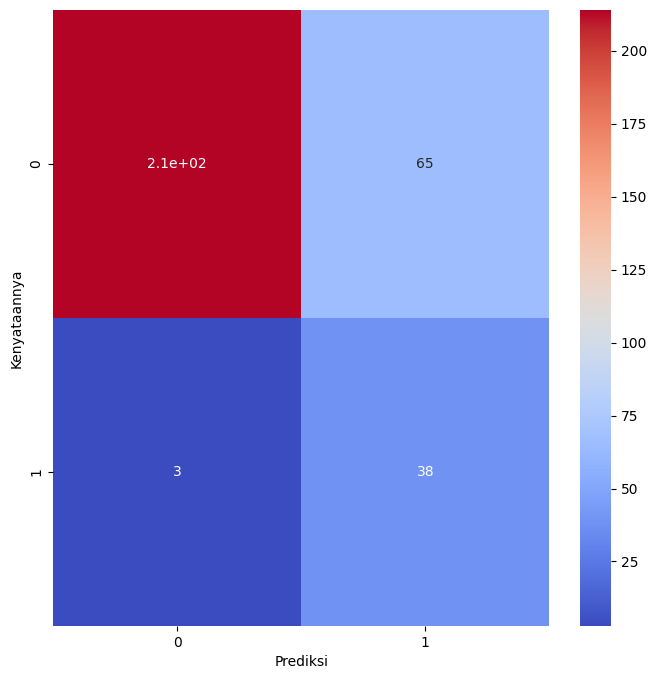

In [24]:
# Menggunakan confusion matrix untuk visualisasi prediksi

import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize = (8, 8))
sn.heatmap(cm, annot = True, cmap = 'coolwarm')
plt.xlabel('Prediksi')
plt.ylabel('Kenyataannya')

Dari hasil visualisasi di atas, performa model sangat kurang bagus, karena jika dilihat perbandingan prediksi benar : kenyataan salah, terlalu banyak daripada prediksi benar : kenyataan benar

-- To be continue --